# 01. Exploratory Data Analysis (EDA)

## Introduction
This notebook explores the MVTec AD dataset, visualizing samples and checking statistics. It is designed to be self-contained and does not rely on external project modules.

## Objectives
1. Visualize normal vs. anomalous images.
2. Check the distribution of categories.
3. Understand the directory structure.

In [ ]:
import os
import sys
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

sys.path.append('..')
from src.preprocessing.dataset import load_and_split_data

# Configuration
DATA_DIR = "../data/raw/"
TARGET_CATEGORY = 'capsule' # Change to None to load all categories

# Check if data exists
if not os.path.exists(DATA_DIR):
    print(f"WARNING: Data directory {DATA_DIR} not found. Please download the dataset first.")
else:
    print(f"Data directory found: {DATA_DIR}")

## 1. Dataset Overview
We list all available categories in the dataset.

In [ ]:
# Load data using the new preprocessing function
if TARGET_CATEGORY:
    print(f"Loading data for category: {TARGET_CATEGORY}...")
    train_df, val_df, test_df, class_names = load_and_split_data(DATA_DIR, target_category=TARGET_CATEGORY, augment=True)
else:
    print("Loading all data (this may take a while)...")
    train_df, val_df, test_df, class_names = load_and_split_data(DATA_DIR, augment=True)

all_df = pd.concat([train_df, val_df, test_df])

print(f"Total images: {len(all_df)}")
print(f"Classes found: {len(class_names)}")
print("Example classes:", class_names[:5])

# Extract unique categories from the dataframe
CATEGORIES = sorted(all_df['category'].unique())
print(f"Found {len(CATEGORIES)} categories: {CATEGORIES}")

## 2. Visualizing Samples
For each category, we display normal training images and examples of anomalies from the test set.

In [7]:
def show_samples(category, num_samples=5):
    # Normal samples
    normal_label = f"{category}_good"
    normal_df = all_df[all_df['label_str'] == normal_label]
    
    if normal_df.empty:
        print(f"No normal samples found for {category}")
        return

    normal_imgs = normal_df['filepath'].tolist()[:num_samples]
    
    # Anomaly samples (everything else for this category)
    anomaly_df = all_df[(all_df['category'] == category) & (all_df['label_str'] != normal_label)]
    
    # Get one sample per defect type to show variety
    defect_types = anomaly_df['label_str'].unique()
    defect_imgs = []
    defect_labels = []
    
    for dt in defect_types:
        sample = anomaly_df[anomaly_df['label_str'] == dt].iloc[0]
        defect_imgs.append(sample['filepath'])
        defect_labels.append(dt)
            
    # Limit to num_samples
    defect_imgs = defect_imgs[:num_samples]
    defect_labels = defect_labels[:num_samples]
        
    plt.figure(figsize=(15, 6))
    plt.suptitle(f"Category: {category}", fontsize=16)
    
    # Plot Normal
    for i, img_path in enumerate(normal_imgs):
        plt.subplot(2, num_samples, i+1)
        img = Image.open(img_path)
        plt.imshow(img)
        plt.title("Normal")
        plt.axis('off')
        
    # Plot Defects
    for i, (img_path, label) in enumerate(zip(defect_imgs, defect_labels)):
        plt.subplot(2, num_samples, num_samples + i + 1)
        img = Image.open(img_path)
        plt.imshow(img)
        # Clean up label for display (remove category prefix)
        display_label = label.replace(f"{category}_", "")
        plt.title(f"Defect: {display_label}")
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

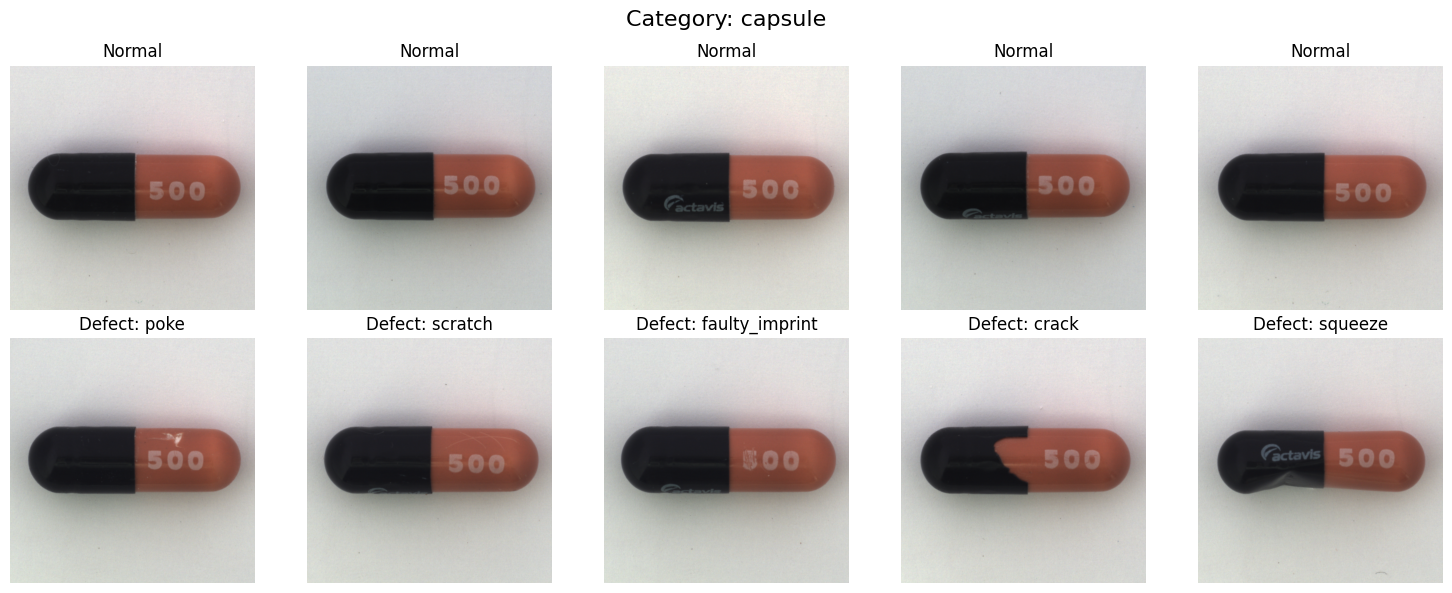

In [9]:
show_samples('capsule')